# Indicators of Heavy Traffic on I-94

The goal of this project is to analyse a dataset with information regarding to the westbound traffic on the I-94 Interstate highway, and determine the main indicators of heaviy traffic. These indicators can be the weather, the time of the day, time of the week etc.

## The I-94 Traffic Dataset
John Hogue made the dataset available that we'll be working with, and you can download it from the UCI Machine Learning Repository.

In [18]:
import pandas as pd
import os
os.getcwd()
i_94 = pd.read_csv("metro-interstate-traffic-volume/Metro_Interstate_Traffic_Volume/Metro_Interstate_Traffic_Volume.csv")
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [19]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [20]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns. There are no null values. Each row describes the specific weather and traffic data for a specific hour. The data goes from the 2nd of October 2012 at 9am until the 30th of November 2018 at 11pm.

The data is recorded by a station located midway between Minneapolis and Saint Paul according to the dataset documentation. The direction of this station is from east to west (i.e westbound). This means that we should not generalise the results we obtain from it to the entire I-94.

<AxesSubplot:ylabel='Frequency'>

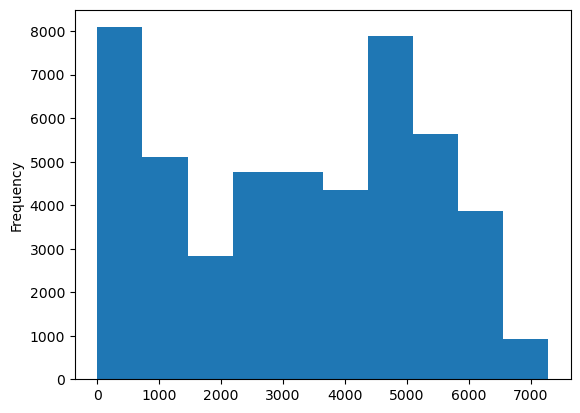

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94["traffic_volume"].plot.hist()
#plt.hist(i_94["traffic_volume"]) doing it like this works, but it doesn't show the "Frequency" label

In [22]:
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The hourly traffic between 2012-10-02 9:00:00 and 2018-09-30 23:00:00 varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or less passing the station per hour. This was probably the case at night time, when the road is under construction. However, there was also more than four times that amount of cars (4933 cars or more) another 25% of the time. This could be due to peak hours of traffic when people have to go to work.

Taking this into account we can see that it can be interesting to analyse the influence of the time on the amount of traffic.

# Traffic Volume: Day vs. Night
<ul>
    <li>Daytime data: hours from 7am to 7pm</li>
    <li>Nighttime data: hours from 7pm to 7am</li>
</ul>

While this is not a perfect criteria to separate nighttime and daytime, it is a good starting point.

In [23]:
i_94["date_time"] = pd.to_datetime(i_94["date_time"]) # to transform the date_time column into datetime
#Do we need to assign it back to i_96["date_time"]

In [27]:
day = i_94.copy()[(i_94["date_time"].dt.hour >=7) & (i_94["date_time"].dt.hour < 19)]
print(day.shape)


(23877, 9)


In [28]:
night = i_94.copy()[(i_94["date_time"].dt.hour >= 19) | (i_94["date_time"].dt.hour < 7)]
print(night.shape)

(24327, 9)


There's a difference in the amount of values for the day and the night. This is due to the fact that we are missing data for a few hours. For example in the rows 176 and 177 `i_94.iloc[176:178]` there's no data for the 4 and 5 hours

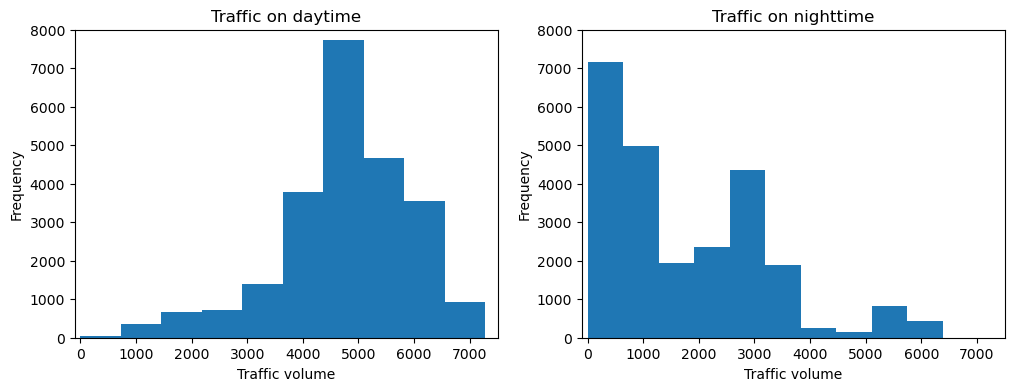

In [34]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Traffic on daytime")
plt.xlabel("Traffic volume")
plt.ylabel("Frequency")
plt.xlim (-100, 7500)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Traffic on nighttime")
plt.xlabel("Traffic volume")
plt.ylabel("Frequency")
plt.xlim (-100, 7500)
plt.ylim(0,8000)
plt.show()

In [36]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [37]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram with the traffic during the day is left skewed, meaning that most of the traffic values are high. In fact, looking at the statistics of the dataset we can see that 75% of the time there are over 4,252 cars passing per hour. 

Thehistogram with the traffic during the night is right skewed, meaning that most of the traffic values are low. In this case only 25% of the time there are more than 2,819 cars passing per hour.

The traffic at night time is for the most part ligher than during the day. Since we only care about heavy traffic for this analysis, moving forward we are only going to work with daytime data.

We have seen that one of the possible indicators of hevy traffic is time, we now want to check if the month, the day of the week, and the time of the day have any impact on the amount of traffic.

In [38]:
day["month"] = day["date_time"].dt.month #this creates a new column right?
by_month = day.groupby("month").mean() #to group by the new "month" column and to aggregate the data using the mean value
by_month["traffic_volume"] #to display the values of traffic_volume per month (which in this case will be the mean of each of the months)

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

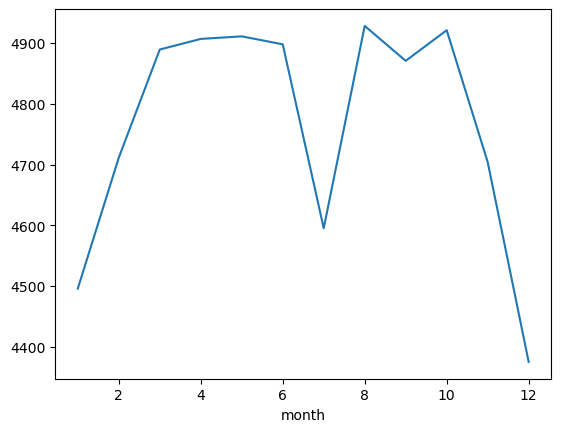

In [40]:
by_month["traffic_volume"].plot.line() #alternatively I could have used plt.plot(by_month["traffic_volume"]) but then the label "month" won't appear
plt.show()

Although looking at the table with the averages is not as obvious, if we look at the line graph it looks like the traffic is lighter during the colder months (November to February). July seems to be an outlier though, despite being a warm month the amount of traffic is also on the ligher side. To understand the reason behind that we are going to look at how the volume changed each year in July.

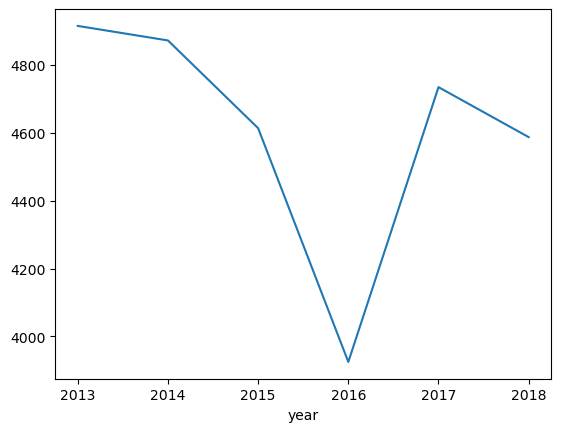

In [43]:
day["year"] = day["date_time"].dt.year #to create a column for the year value of the date
only_july = day[day["month"] == 7] #to filter the data in day for the month of July while still having the data per year
only_july.groupby("year").mean()["traffic_volume"].plot.line() #to group the data of July by the year using the mean, and then plot it in a line graph
plt.show()

Ok, so the traffic in July is normally pretty heavy. The mean that we saw when analysing the traffic per month was skewed due to the low numbers in 2016. Apparently, during that time the road was __[going through construction works](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696)__, which would explain that lower amount of traffic during July 2016.

## Time indicators

Let's now look at a more granular indicator: day number, or day of the week.

In [47]:
day["dayofweek"] = day["date_time"].dt.dayofweek
by_dayofweek = day.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"]

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

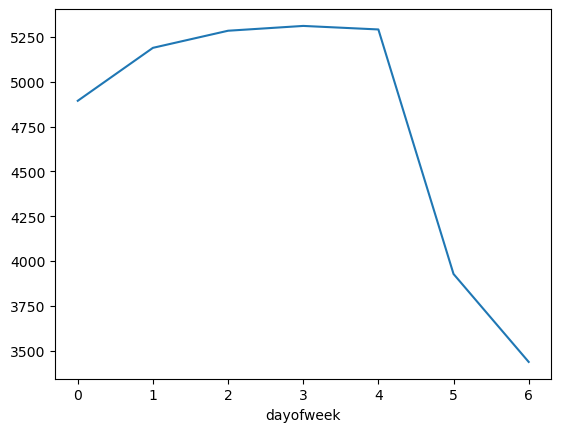

In [48]:
by_dayofweek["traffic_volume"].plot.line()
plt.show()

Traffic volume is heavier Monday to Friday and a lot lighter on Saturday and Sunday. During the week numbers are close or over 5000, while during the weekend numbers don't reach the 4000 mark.

## Time indicators 2

We know want to look at data per hour, but we want to exclude the weekends because that will skew the results to lower numbers.

In [51]:
day["hour"] = day["date_time"].dt.hour
business_days = day.copy()[day["dayofweek"] < 5]
weekend = day.copy()[day["dayofweek"] >= 5]
by_business_hour = business_days.groupby("hour").mean()
by_weekend_hour = weekend.groupby("hour").mean()

print(by_business_hour["traffic_volume"])
print(by_weekend_hour["traffic_volume"])



hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


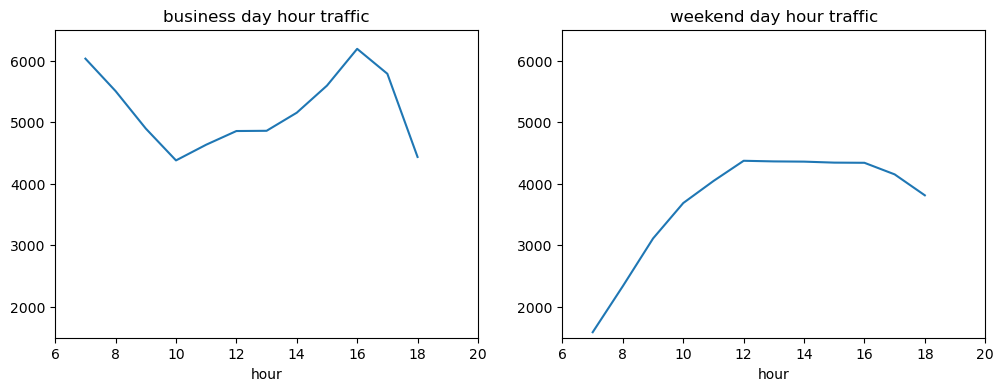

In [57]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
by_business_hour["traffic_volume"].plot.line()
plt.title("business day hour traffic")
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1,2,2)
by_weekend_hour["traffic_volume"].plot.line()
plt.title("weekend day hour traffic")
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.show()

The traffic overall seems to always be higher during business days no matter the time of day. Also, rush hours at 7am and 4pm are the hours with the highest amounts of traffic, which makes sense considering that's the time at which people would go to and from work. At those times we see volumes of over 6000 cars.

So as a summary in terms of time we can say that:
<ul>
    <li>The traffic is usually heavier during warm months (March-October)</li>
    <li>The traffic is usually heavier on weekdays (Monday-Friday)</li>
    <li>The traffic is usually heavier at rush hours 7am and 4pm</li>

## Weather indicators

So far we know that time has an effect on traffic. We now want to see if weather does too since we know that the traffic is heavier when the weather tends to be nicer than when it isn't.

In [59]:
day.corr()["traffic_volume"] #to find the correlations of all the numeric columns in the day dataset to "traffic_volume" (could I use the i_94 dataset instead?)

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Apart from dayofweek which we already know it is related to traffic, temprature is the one with the strongest correlation. Other factors such as `rain`, `snow`, `clouds` that are relevant for the weather analysis, do not show a strong correlation. 

Let's create a scatter plot for both traffic volume and temperature.

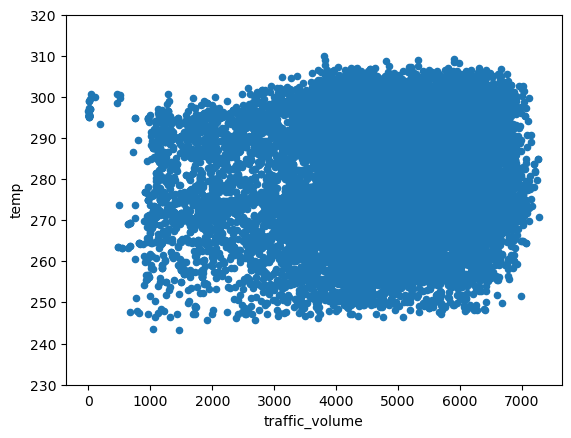

In [62]:
day.plot.scatter("traffic_volume", "temp")
plt.ylim(230,320) # we need to specify this because two wrong OK temperatures mess up the y-axis
plt.show()

By looking at the scatter plot we can say that the temperature doesn't seem to be a reason for heavy traffic.

Let's now look at `weather_main` and `weather_description`.

## Weather types

To start, we are going to group the data by wather_main and look at the traffic_volume averages.

In [64]:
by_weather_main = day.groupby("weather_main").mean()
by_weather_description = day.groupby("weather_description").mean()

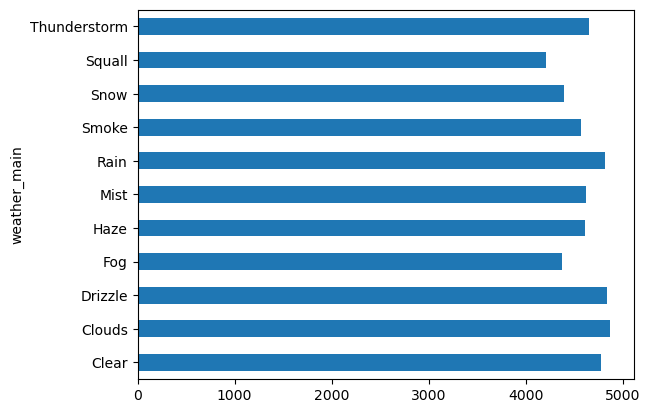

In [68]:
by_weather_main["traffic_volume"].plot.barh()
plt.show()

IT doesn't look like there's any weather type where traffic exceeds 5000 cars. This makes finding a heavy traffic indicator more difficult.

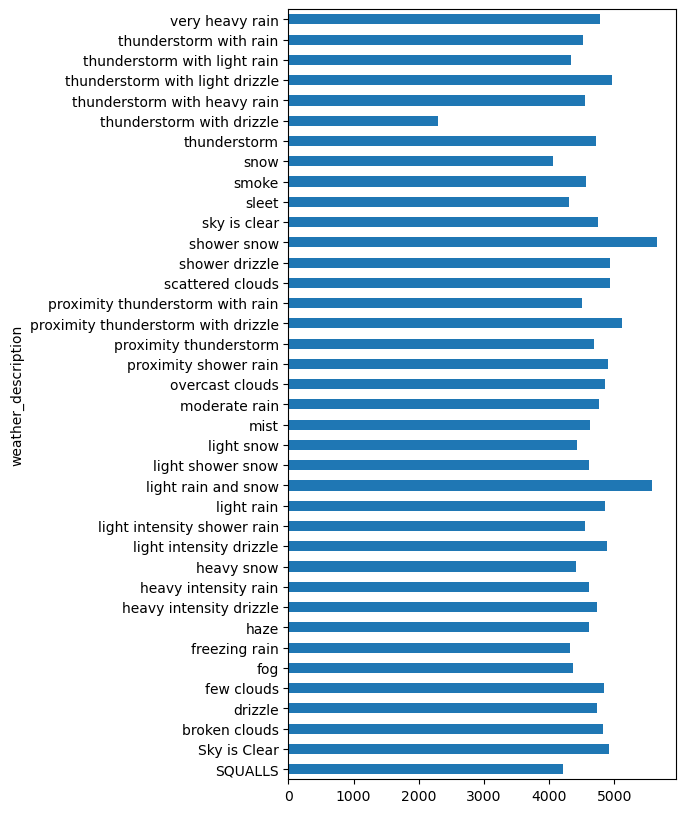

In [70]:
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))
plt.show()

In this case both `shower snow`and `light rain and snow` as well as `thunderstorm with light drizzle`have traffic volumes that exceed 5000. 

We don't really know why these would have that heavier amount of traffic, since they are bad weather but not that bad. Perharps people take their cars out more when the weather is bad.

## Conclusion

We have been able to find a few indicators of heavy traffic.

<ul>
    <li>Time indicators</li>
    <ul>
        <li>Traffic is heavier during warmer months (March to October)</li>
        <li>The traffic is usually heavier in business days (Monday to Friday)</li>
        <li>On business days rush hours are 7am and 4pm</li>
    </ul>
    <li>Weahter indicators</li>
    <ul>
        <li>Shower snow</li>
        <li>Light rain and snow</li>
        <li>Proximity of thunderstom and drizzle</li>
    </ul>
</ul>